The gaming industry is certainly one of the thriving industries of the modern age and one of those that are most influenced by the advancement in technology. With the availability of technologies like AR/VR in consumer products like gaming consoles and even smartphones, the gaming sector shows great potential. In this hackathon, you as a data scientist must use your analytical skills to predict the sales of video games depending on given factors. Given are 8 distinguishing factors that can influence the sales of a video game. Your objective as a data scientist is to build a machine learning model that can accurately predict the sales in millions of units for a given game.

In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/video-games-sales-prediction/Test.csv
/kaggle/input/video-games-sales-prediction/Sample_Submission.csv
/kaggle/input/video-games-sales-prediction/Train.csv


In [2]:
train = pd.read_csv('/kaggle/input/video-games-sales-prediction/Train.csv')
test = pd.read_csv('/kaggle/input/video-games-sales-prediction/Test.csv')
sub = pd.read_csv('/kaggle/input/video-games-sales-prediction/Sample_Submission.csv')

In [3]:
train.shape, test.shape, sub.shape

((3506, 9), (1503, 8), (1503, 1))

In [4]:
train.head(5)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [5]:
train.isnull().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

In [6]:
train.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2187
SalesInMillions    3506
dtype: int64

In [7]:
sub.head()

,SalesInMillions
0,1.497533
1,2.368795
2,2.630505
3,2.506086
4,1.970574


# Uni-variate Analysis

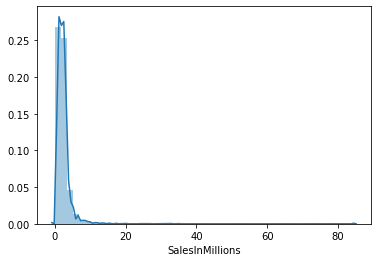

In [8]:
sns.distplot(train['SalesInMillions']);

In [9]:
# 7th Gen: Playstation 3 vs XBOX360 vs Nintendo Wii
# 8th Gen: Playstation 4 vs XBOXONE vs Nintendo WiiU

In [10]:
train['CONSOLE'].value_counts()

ps2     585
x360    448
ps3     438
pc      315
x       266
wii     254
ds      246
psp     180
gc      164
gba     129
ps4     121
xone     85
3ds      84
ps       83
psv      59
wiiu     45
dc        4
Name: CONSOLE, dtype: int64

In [11]:
import matplotlib.style as style
style.available
style.use('bmh')

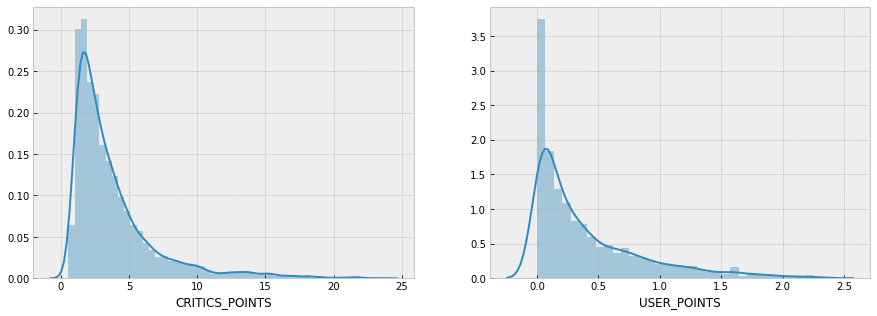

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(train['CRITICS_POINTS'], ax=ax1)
sns.distplot(train['USER_POINTS'], ax=ax2);

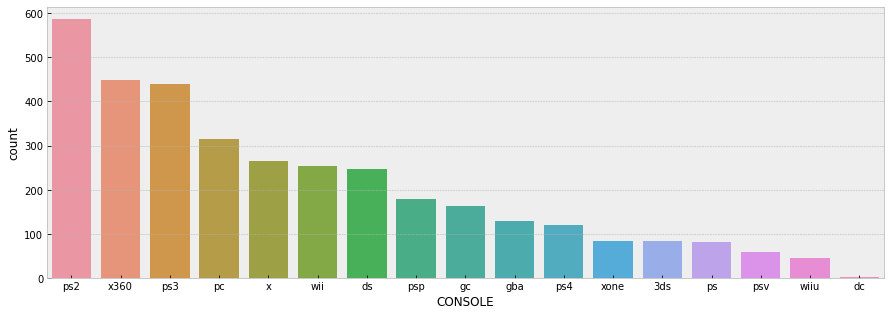

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(train['CONSOLE'], order=train['CONSOLE'].value_counts().index);

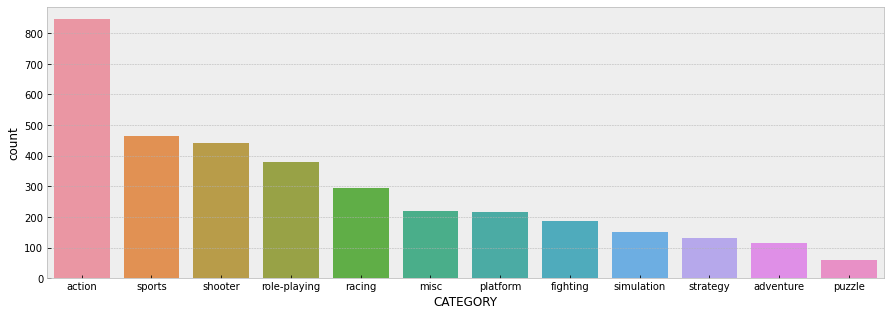

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(train['CATEGORY'], order=train['CATEGORY'].value_counts().index);

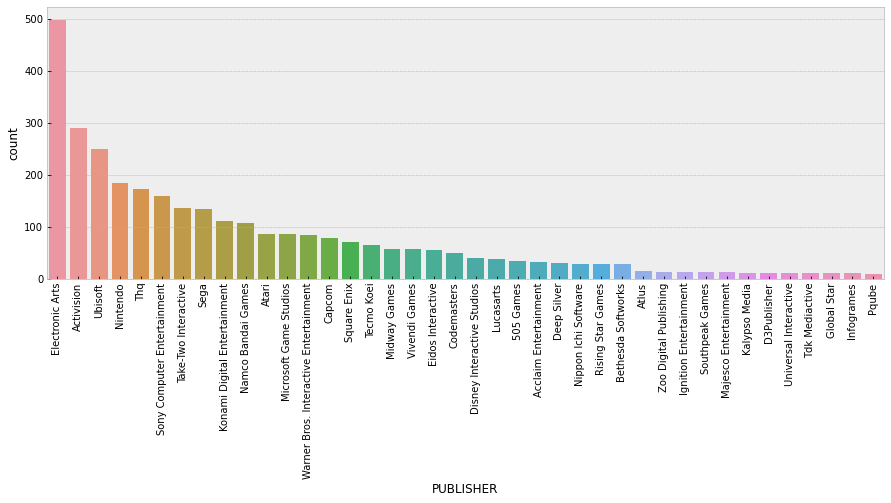

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(train['PUBLISHER'], order=train['PUBLISHER'].value_counts().iloc[:40].index)
plt.xticks(rotation=90);

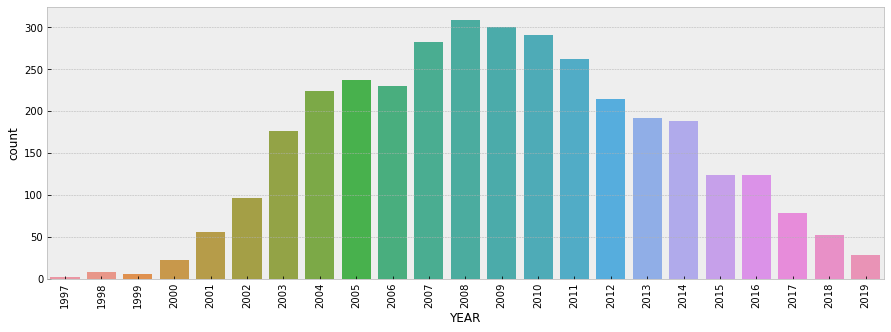

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(train['YEAR'])
plt.xticks(rotation=90);

# Bi-variate Analysis

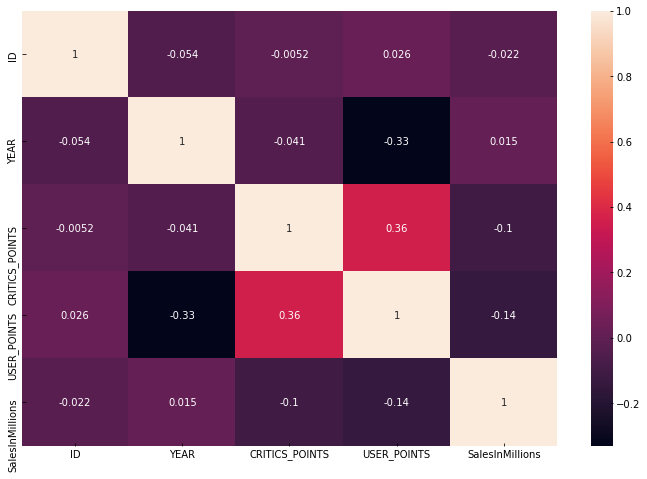

In [17]:
plt.figure(figsize=(12, 8))

train_corr = train.corr()
sns.heatmap(train_corr, 
            xticklabels = train_corr.columns.values,
            yticklabels = train_corr.columns.values,
            annot = True);

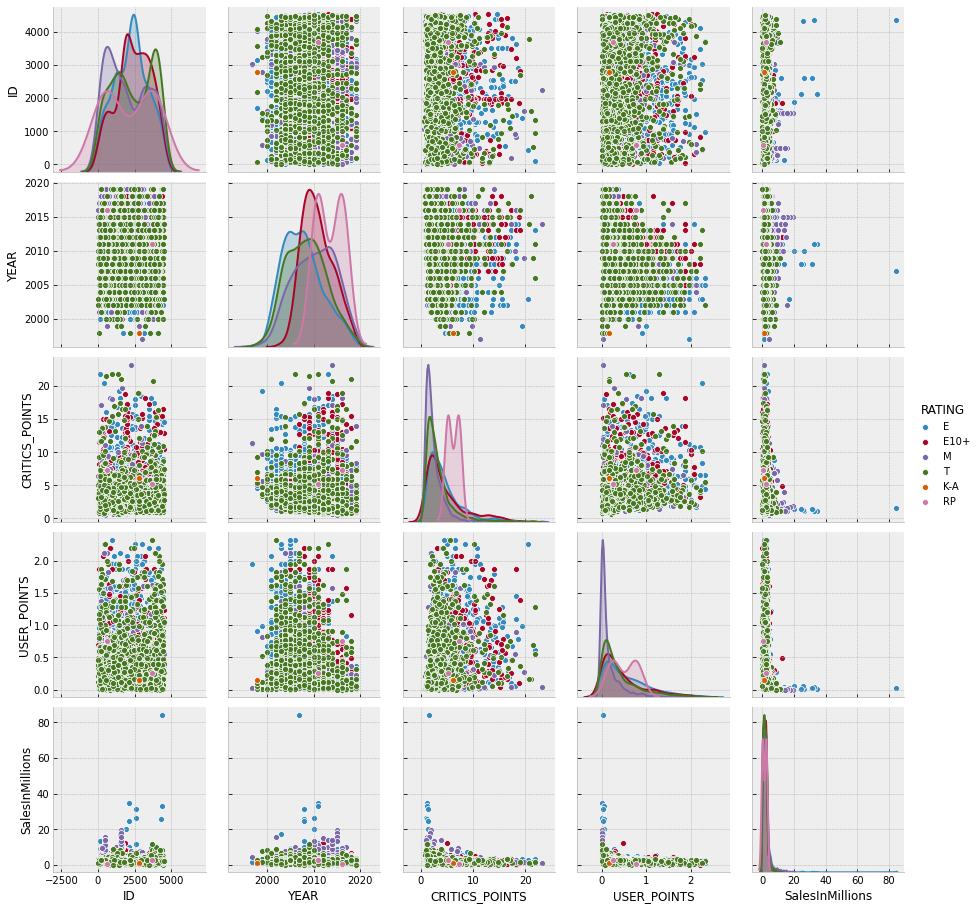

In [18]:
sns.pairplot(train, hue='RATING', diag_kind='kde');

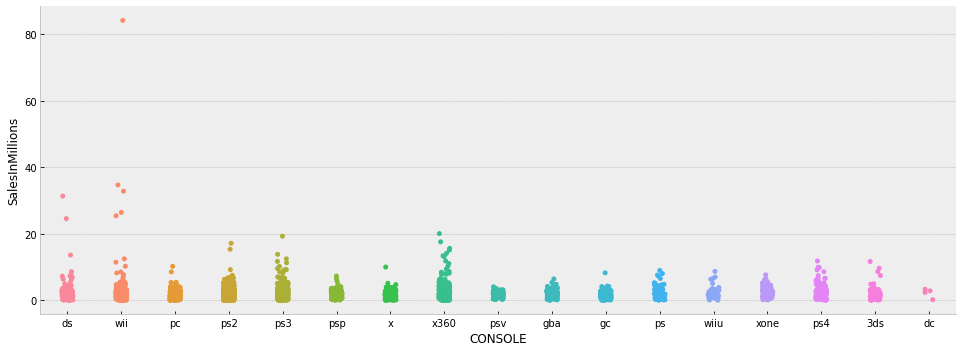

In [19]:
g = sns.catplot(x="CONSOLE", y="SalesInMillions", data=train);
g.fig.set_size_inches(15,5)

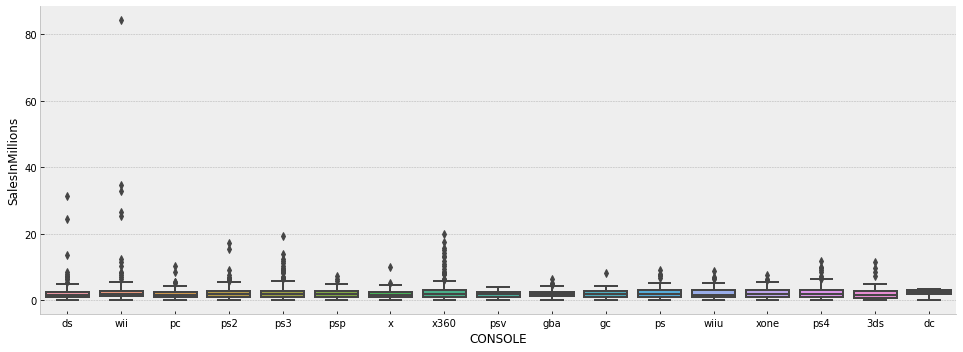

In [20]:
g = sns.catplot(x="CONSOLE", y="SalesInMillions", kind="box", data=train)
g.fig.set_size_inches(15,5);

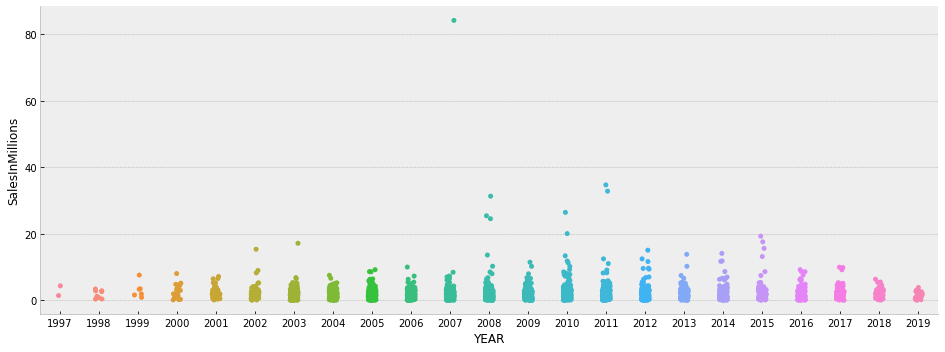

In [21]:
g = sns.catplot(x="YEAR", y="SalesInMillions", data=train)
g.fig.set_size_inches(15,5);

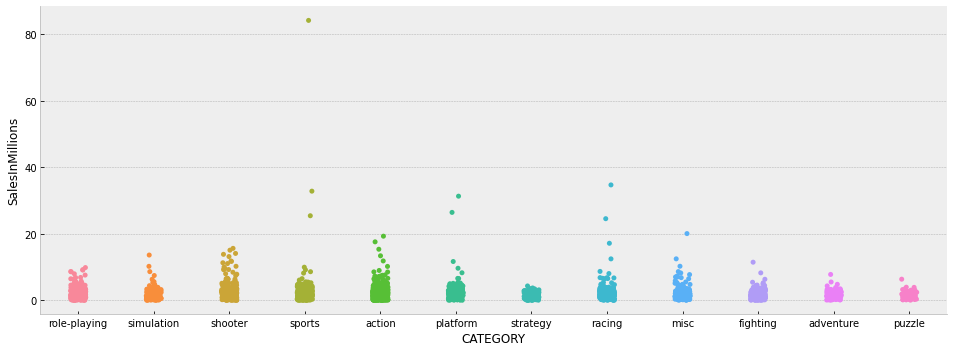

In [22]:
g = sns.catplot(x="CATEGORY", y="SalesInMillions", data=train)
g.fig.set_size_inches(15,5);

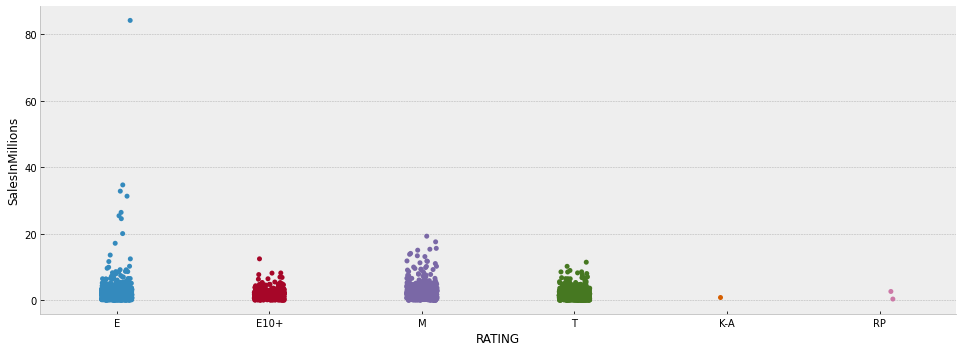

In [23]:
g = sns.catplot(x="RATING", y="SalesInMillions", data=train)
g.fig.set_size_inches(15,5);

In [24]:
train['RATING'].value_counts()

T       1182
E       1061
M        749
E10+     511
RP         2
K-A        1
Name: RATING, dtype: int64

In [25]:
test['RATING'].value_counts()

T       530
E       457
M       321
E10+    194
AO        1
Name: RATING, dtype: int64

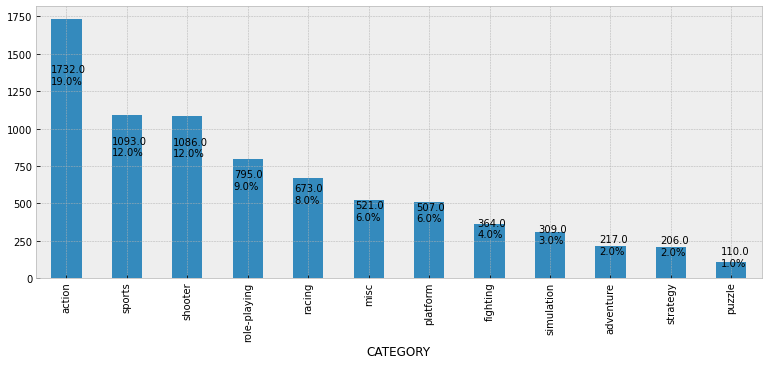

In [26]:
x = train.groupby(['CATEGORY']).sum().copy()
ax = x['SalesInMillions'].sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() /89.170) )+ "%", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

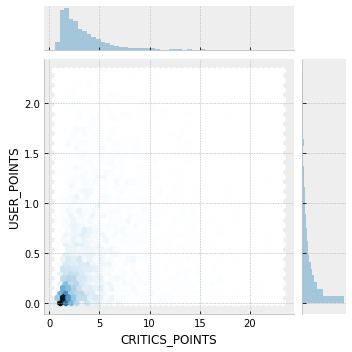

In [27]:
sns.jointplot(x='CRITICS_POINTS',y='USER_POINTS',data=train, kind='hex', size=5);

# Feature Engineering & Pre-processing

In [28]:
train = train[train['RATING'] != 'RP']
train = train[train['RATING'] != 'K-A']

In [29]:
train = train[train['SalesInMillions'] < 30]

In [30]:
df = train.append(test,ignore_index=True)
df.shape

(5002, 9)

In [31]:
df.head(3)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402


In [32]:
agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('CONSOLE').agg(agg_func)
agg_func.columns = [ 'CONSOLE_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['CONSOLE'], how='left')

agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('CATEGORY').agg(agg_func)
agg_func.columns = [ 'CATEGORY_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['CATEGORY'], how='left')

agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('PUBLISHER').agg(agg_func)
agg_func.columns = [ 'PUBLISHER_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['PUBLISHER'], how='left')

agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('RATING').agg(agg_func)
agg_func.columns = [ 'RATING_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['RATING'], how='left')

In [33]:
#df['Old'] = 2020 - df['YEAR']

In [34]:
df['Unique_CATEGORY_per_CONSOLE'] = df.groupby(['CONSOLE'])['CATEGORY'].transform('nunique')

In [35]:
calc = df.groupby(['CONSOLE'], axis=0).agg({'CONSOLE':[('op1', 'count')]}).reset_index() 
calc.columns = ['CONSOLE','CONSOLE Count']
df = df.merge(calc, on=['CONSOLE'], how='left')

calc = df.groupby(['CATEGORY'], axis=0).agg({'CATEGORY':[('op1', 'count')]}).reset_index() 
calc.columns = ['CATEGORY','CATEGORY Count']
df = df.merge(calc, on=['CATEGORY'], how='left')

calc = df.groupby(['PUBLISHER'], axis=0).agg({'PUBLISHER':[('op1', 'count')]}).reset_index() 
calc.columns = ['PUBLISHER','PUBLISHER Count']
df = df.merge(calc, on=['PUBLISHER'], how='left')

calc = df.groupby(['RATING'], axis=0).agg({'RATING':[('op1', 'count')]}).reset_index() 
calc.columns = ['RATING','RATING Count']
df = df.merge(calc, on=['RATING'], how='left')

In [36]:
for c in ['ID', 'CONSOLE', 'CATEGORY', 'PUBLISHER', 'RATING']:
    df[c] = df[c].astype('category')

In [37]:
#df.drop('ID', axis=1, inplace=True)

In [38]:
agg_func = {
    'CRITICS_POINTS': ['mean','sum']   
}
agg_func = df.groupby(['YEAR','CONSOLE']).agg(agg_func)
agg_func.columns = [ 'YEAR_CONSOLE_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['YEAR','CONSOLE'], how='left')

In [39]:
# 7th Gen: Playstation 3 vs XBOX360 vs Nintendo Wii
# 8th Gen: Playstation 4 vs XBOXONE vs Nintendo WiiU

def check_if_latest(console):
    if console in ['ps3','x360','wii','ps4','xone','wiiu']:
        return 1
    else:
        return 0    

df['LATEST'] = df['CONSOLE'].apply(check_if_latest)

In [40]:
train_df = df[df['SalesInMillions'].isnull()!=True]
test_df = df[df['SalesInMillions'].isnull()==True]
test_df.drop(['SalesInMillions'], axis=1, inplace=True)

In [41]:
X = train_df.drop(labels=['SalesInMillions'], axis=1)
y = train_df['SalesInMillions'].values

X.shape, y.shape

((3499, 48), (3499,))

In [42]:
X.head(3)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,CONSOLE_CRITICS_POINTS_mean,CONSOLE_CRITICS_POINTS_min,...,RATING_USER_POINTS_max,RATING_USER_POINTS_sum,Unique_CATEGORY_per_CONSOLE,CONSOLE Count,CATEGORY Count,PUBLISHER Count,RATING Count,YEAR_CONSOLE_CRITICS_POINTS_mean,YEAR_CONSOLE_CRITICS_POINTS_sum,LATEST
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,4.440908,1.014286,...,2.375,839.851541,12,338,510,247,1514,4.015551,269.041923,0
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,4.321977,0.873418,...,2.325,322.726985,12,364,222,162,705,4.557810,191.428022,1
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,4.120763,0.846154,...,2.200,188.092307,12,459,621,397,1070,6.931070,27.724279,0


In [43]:
from math import sqrt 
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [44]:
Xtest = test_df

In [45]:
errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 2500,
         'num_leaves': 20,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.9,
         'bagging_freq': 1,
         'feature_fraction': 0.9,
         'early_stopping_round': 100,
         }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSE LGBM: ", sqrt(mean_squared_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_squared_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

print('\nMean RMSE', np.mean(errlgb,0))

RMSE LGBM:  1.2622893817345218
RMSE LGBM:  1.2599306512421224
RMSE LGBM:  1.7701376628603314
RMSE LGBM:  1.5174694772543607
RMSE LGBM:  1.2956887147740352
RMSE LGBM:  1.4817668240307138
RMSE LGBM:  1.4166962060568395
RMSE LGBM:  1.4784267984441095
RMSE LGBM:  1.428600570829355
RMSE LGBM:  2.096724939301825

Mean RMSE 1.5007731226528214


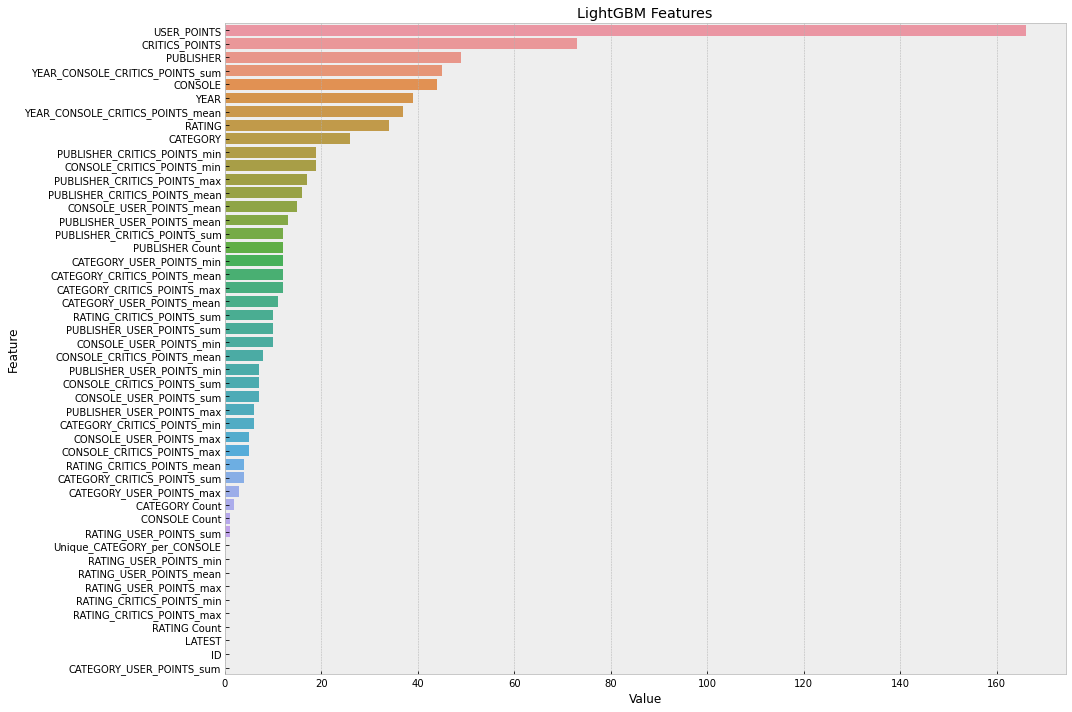

In [46]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, X.columns), reverse=True)[:], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [47]:
errcat = []
y_pred_totcat = []
categorical_features_indices = np.where(X.dtypes == 'category')[0]

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostRegressor(loss_function='RMSE', 
                         eval_metric='RMSE', 
                         depth=8,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.1,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred_cat)))

    errcat.append(sqrt(mean_squared_error(y_test, y_pred_cat)))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)
    
print('\nMean RMSE', np.mean(errcat,0))

RMSE:  1.242836207801821
RMSE:  1.2567661717359018
RMSE:  1.8057915514172147
RMSE:  1.529498939422155
RMSE:  1.2922580640535521
RMSE:  1.5146008752146107
RMSE:  1.3984182648679075
RMSE:  1.5427863257288414
RMSE:  1.452885565245702
RMSE:  2.1516099143504364

Mean RMSE 1.518745187983814


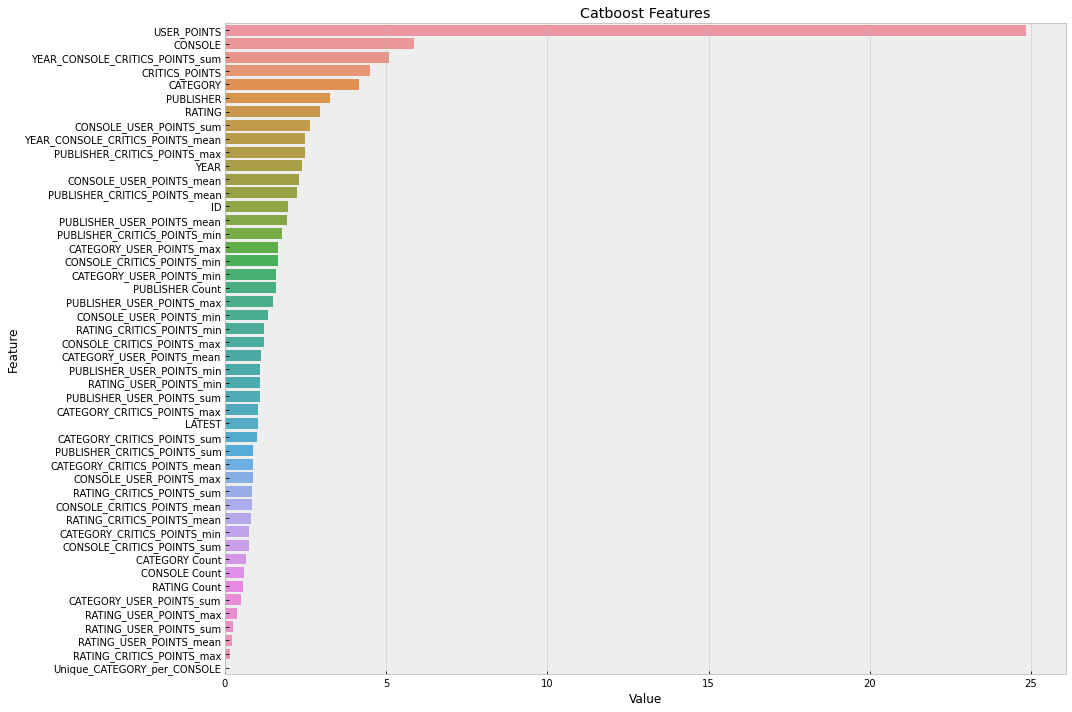

In [48]:
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [49]:
final_lgb = np.mean(y_pred_totlgb,0)
final_cat = np.mean(y_pred_totcat,0)

In [50]:
sub['SalesInMillions'] = final_lgb

In [51]:
sub.head()

,SalesInMillions
0,1.850032
1,2.297890
2,3.244458
3,1.864713
4,1.749327


In [52]:
sub.to_csv('Submission.csv', index=False)